In [1]:
import numpy as np
np.bool = np.bool_
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib as mt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import sys
sys.path.append('../../0_python_modules/')
import msm_analysis as ana
import idp_analysis as idp

In [2]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,70+1,5)
n_pcca = np.array([2, 3, 4, 5, 6])

In [3]:
def get_msm_labels(diff, nc, ml, npc):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                out.append([ nc[i], ml[j], npc[k], diff[i,j,k] ])
    return np.array(out)

In [4]:
def get_frames(mdis, dtrj, stds, 
               microstate='large',):
    frames = []
    for a,macro in enumerate(mdis):
        if microstate=='large':
            micro = macro[ stds[macro].argmax() ]
        else:
            micro = macro[ stds[macro].argmin() ]
            
        nframes = np.where(dtrj==micro)
        frames.append(nframes[0])
        
    return frames

def write_frames(pdb, trajs, idata,
                 fid, nconfs=10, otype='random', sel='all', sel2='all',
                ofmt='pdb', opath='./', oname='frame'):
    
    uni = mda.Universe(f'{pdb}', f'{trajs}')
    
    dd = idata[fid]
    
    if otype=='random':
        np.random.seed(0)
        oframes = np.random.choice(fid, nconfs)
    elif otype == 'min':
        oframes = fid[dd.argsort()[:nconfs]]
    elif otype == 'max':
        oframes = fid[dd.argsort()[::-1][:nconfs]]
    elif otype == 'variable':
        oframes = fid[dd.argsort()[::int(len(fid)/nconfs)][:nconfs]]
    else:
        raise ValueError(f'{otype} not in [random, variable, min, max]')
        
    for a,i in enumerate(oframes):
        uni.trajectory[i]
        aa = uni.select_atoms(f'{sel}')
        aa = aa.translate(-uni.select_atoms(sel2).center_of_mass())
        aa.write(f'{opath}{oname}{a}.{ofmt}')

In [5]:
colors = np.array(['salmon', 'dodgerblue', 'teal', 'limegreen', 'sienna', 'violet'])
cmaps = [mt.colors.LinearSegmentedColormap.from_list('', colors[:i], N=i) for i in range(2, 7)]

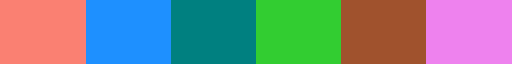

In [6]:
cmaps[4]

In [7]:
trajs = '../../1_datasets/idp_rg/pnas2018b-asyn-a99SBdisp-extended-protein-combined.xtc'
pdb = '../../1_datasets/idp_rg/DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb'

In [8]:
idata1 = np.loadtxt('../../1_datasets/idp_rg/rg_system.xvg', comments=['@','#'])[:,1]
idata2 = np.loadtxt('../../1_datasets/idp_rg/dist_ca_10-130.xvg', comments=['@','#'])[:,1]

In [9]:
durf = np.load('urf/saved_fdiffs/cmean_strict.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==4]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [100.  10.   4.  36.]
1 [500.    60.     4.    29.67]
2 [500.    45.     4.   105.67]
3 [50.   10.    4.   55.67]
4 [700.    20.     4.    24.17]


In [10]:
durf = np.load('urf/saved_dbi/dbi.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==4]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [70.   20.    4.    2.91]
1 [30.    5.    4.    3.28]
2 [350.    55.     4.     4.35]
3 [250.    15.     4.     3.02]
4 [30.    5.    4.    2.26]


## i=2, cl=500, ml=45, pc=4

In [11]:
i=2
cl = 500
ml = 45
pc = 4

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([187]),
 array([  3,   4,  10,  11,  16,  28,  29,  30,  33,  41,  43,  55,  58,
         59,  61,  62,  67,  79,  89,  92,  99, 108, 109, 110, 111, 113,
        121, 123, 125, 127, 130, 132, 139, 140, 143, 149, 157, 164, 168,
        173, 174, 179, 184, 193, 196, 207, 214, 215, 217, 224, 226, 230,
        233, 240, 242, 252, 253, 260, 262, 267, 268, 278, 279, 290, 294,
        295, 296, 299, 304, 312, 314, 315, 316, 327, 329, 330, 331, 332,
        335, 340, 342, 347, 357, 373, 374, 375, 377, 381, 389, 391, 397,
        401, 404, 410, 413, 415, 422, 427, 431, 436, 438, 441, 444, 452,
        455, 458, 459, 464, 468, 472, 473, 474, 475, 481, 483, 488, 493,
        496, 498, 499]),
 array([  1,   8,  13,  17,  26,  39,  42,  49,  71,  72,  73,  77,  81,
         85, 106, 107, 114, 115, 126, 134, 135, 141, 145, 153, 155, 161,
        163, 165, 170, 172, 178, 185, 197, 199, 203, 216, 220, 223, 232,
        243, 246, 247, 249, 261, 280, 281, 285, 293, 298, 300, 305, 307,
        310

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.91it/s]


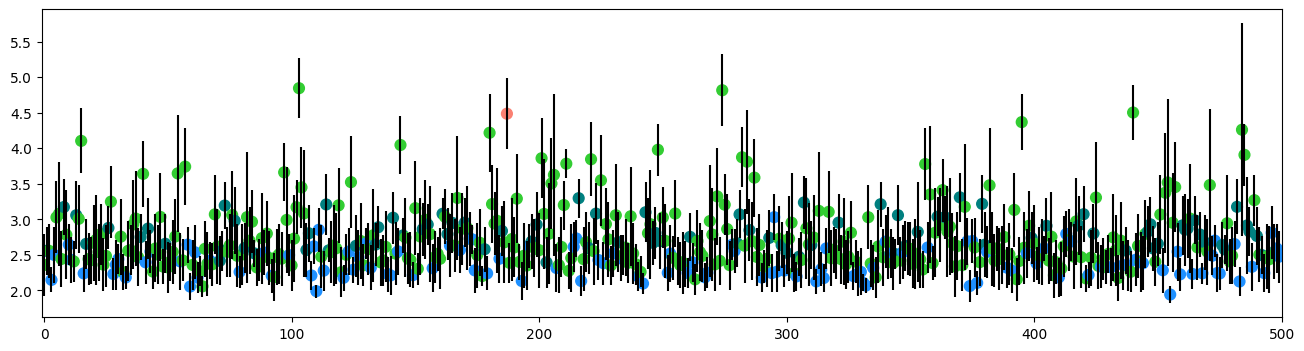

In [12]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

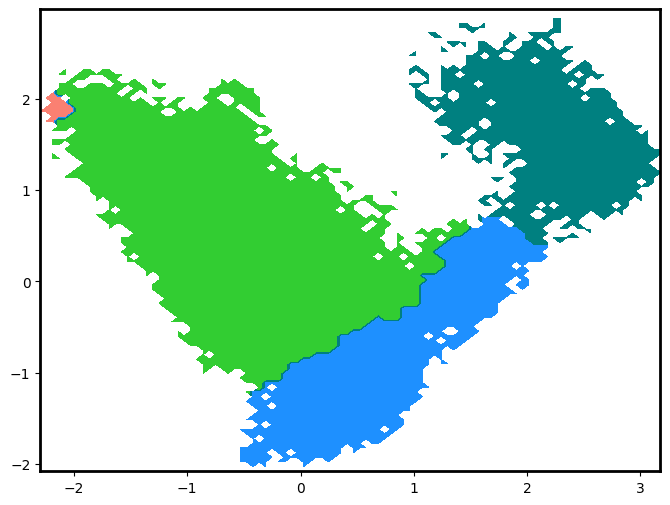

In [13]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=3, cl=50, ml=10, pc=4

In [14]:
i=3
cl = 50
ml = 10
pc = 4

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([ 1,  5,  9, 27, 32, 40, 41, 47]),
 array([ 7, 20, 23, 24, 25, 29, 44, 45]),
 array([ 0,  2,  4,  8, 10, 12, 13, 14, 15, 17, 18, 30, 31, 33, 34, 35, 37,
        39, 42, 43, 46, 48, 49]),
 array([ 3,  6, 11, 16, 19, 21, 22, 26, 28, 36, 38])]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.90it/s]


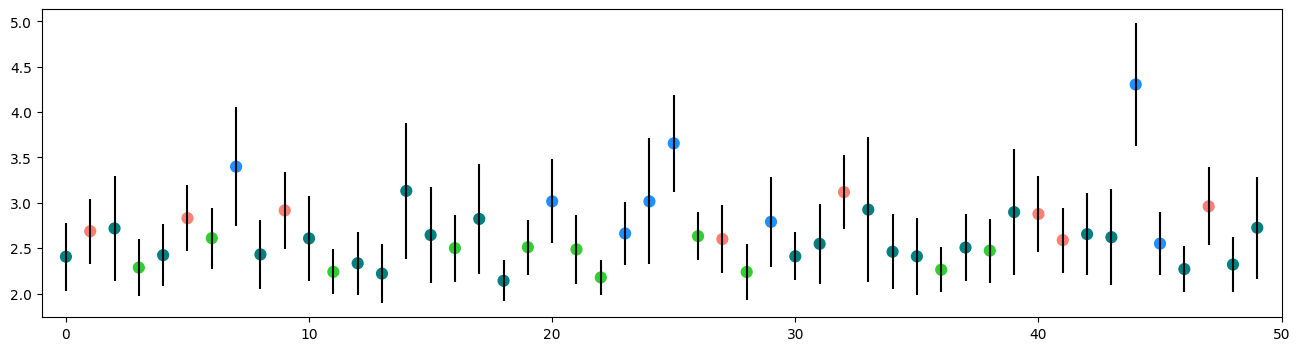

In [15]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

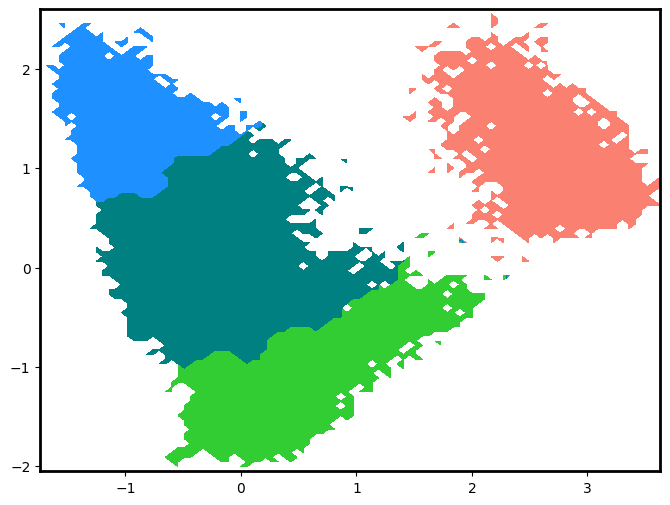

In [16]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=4, cl=30, ml=5, pc=4

In [17]:
i=4
cl = 30
ml = 5
pc = 4

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([10, 23]),
 array([ 1,  6, 14, 26]),
 array([ 2,  5,  7, 11, 16, 17, 27, 28, 29]),
 array([ 0,  3,  4,  8,  9, 12, 13, 15, 18, 19, 20, 21, 22, 24, 25])]

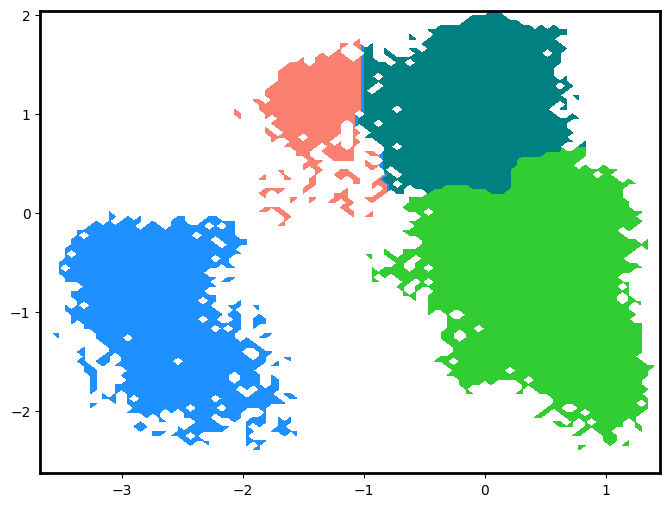

In [18]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()